<h1 style="text-align:center;">Laboratorio 4</h1>
<h4 style="text-align:center;">Cristopher Barrios</h4>
<h4 style="text-align:center;">Mariana David</h4>
<h5 style="text-align:center;">25/8/2023</h5>

## Lil Pips

In [1]:
#pip install nltk

## Librerias

In [43]:
import pandas as pd
import io 
import re
from cgitb import text
from collections import Counter, defaultdict
from wordcloud import WordCloud
import matplotlib.pyplot as plt

1. Descargue el archivo train.csv

In [18]:
df = pd.read_csv('data/train.csv')

2. Cargue los archivos de datos a R o a Python, dependiendo de con qué trabaje.

In [19]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


3. Limpie y preprocese los datos. Describa de forma detallada las actividades de preprocesamiento
que llevó a cabo. 3.1. Se pueden hacer tareas como:



3.1. Se pueden hacer tareas como:
- Convertir el texto a mayúsculas o a minúsculas


In [20]:
df['text'].str.lower()
df['location'].str.lower()
df['keyword'].str.lower()
#print(df.head())

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
7608    NaN
7609    NaN
7610    NaN
7611    NaN
7612    NaN
Name: keyword, Length: 7613, dtype: object

- Quitar los caracteres especiales que aparecen como “#”,”@” o los apóstrofes.


In [21]:
df.text = df.text.str.replace('[#,@,&,(,),!,?,/,{,},%,!]', '')
df.location = df.location.str.replace('[#,@,&,(,),!,?,/,{,},%,!]', '')
df.keyword = df.keyword.str.replace('[#,@,&,(,),!,?,/,{,},%,!]', '')

C:\Users\cjrba\AppData\Local\Temp\ipykernel_13396\2394621819.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.text = df.text.str.replace('[#,@,&,(,),!,?,/,{,},%,!]', '')
C:\Users\cjrba\AppData\Local\Temp\ipykernel_13396\2394621819.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.location = df.location.str.replace('[#,@,&,(,),!,?,/,{,},%,!]', '')
C:\Users\cjrba\AppData\Local\Temp\ipykernel_13396\2394621819.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.keyword = df.keyword.str.replace('[#,@,&,(,),!,?,/,{,},%,!]', '')


- Quitar las url


In [22]:
df.text = [re.sub('\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*','',i) for i in df.text]
df.text = [re.sub(r'^https?:\/\/.*[\r\n]*', '', i) for i in df.text]

- Revisar si hay emoticones y quitarlos


In [23]:
df.text = [re.sub('[^a-zA-Z0-9 ]+','', i) for i in df.text]

- Quitar los signos de puntuación


In [24]:
# Función para quitar signos de puntuación
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# Aplicar la función a la columna 'text'
df['text'] = df['text'].apply(remove_punctuation)

# Mostrar el DataFrame resultante
print(df)

         id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this earthquake Ma...       1  
1                 Forest fire near La Ronge Sask Canada       1  
2     All residents asked to shelter in place are be...       1  
3     13000 people receive wildfires evacuation orde...       1  
4     Just got sent this photo from Ruby Alaska as s...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  ariaahrary TheTawniest The out of control wild...       1  
7610  M194 0104 UTC5k

- Quitar los artículos, preposiciones y conjunciones (stopwords)


In [33]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
nltk.download('stopwords')  # You might need to download NLTK data for stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cjrba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:


stopwords = set(stopwords.words('english') + ['the', 'i', 'a', 'deeds', 'im','rt','jk','btw','lol','yolo','lmao','lmfao','fb','like','get','em', 'I', 'The', 'A', 'Amp', 'amp'])
expresiones = ['im','rt','jk','btw','lol','yolo','lmao','lmfao','fb','like','get','em', 'Im', 'in', 'In', '2']
for i in expresiones:
    stopwords.add(i)

df['text_without_stopwords'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

clean_tweets = df['text_without_stopwords']
print(df['text_without_stopwords'])

0        Our Deeds Reason earthquake May ALLAH Forgive us
1                   Forest fire near La Ronge Sask Canada
2       All residents asked shelter place notified off...
3       13000 people receive wildfires evacuation orde...
4       Just got sent photo Ruby Alaska smoke wildfire...
                              ...                        
7608    Two giant cranes holding bridge collapse nearb...
7609    ariaahrary TheTawniest control wild fires Cali...
7610    M194 0104 UTC5km S Volcano Hawaii httptcozDtoy...
7611    Police investigating ebike collided car Little...
7612    Latest More Homes Razed Northern California Wi...
Name: text_without_stopwords, Length: 7613, dtype: object


- Quitar números si considera que interferirán en la clasificación (quizá debería valorar
si quitar o no el 911).

In [15]:
import pandas as pd
import re

# Crear una función para preprocesar el texto
def preprocesar_texto(texto):
    return re.sub(r'\d+', '', texto.lower())

# Suponiendo que ya tienes un DataFrame llamado 'df' con una columna 'text'
df['texto_preprocesado'] = df['text'].apply(preprocesar_texto)

# Mostrar las primeras filas para ver los cambios
df[['text', 'texto_preprocesado']].head()


,text,texto_preprocesado
0,Our Deeds are the Reason of this earthquake Ma...,our deeds are the reason of this earthquake ma...
1,Forest fire near La Ronge Sask Canada,forest fire near la ronge sask canada
2,All residents asked to shelter in place are be...,all residents asked to shelter in place are be...
3,13000 people receive wildfires evacuation orde...,people receive wildfires evacuation orders in...
4,Just got sent this photo from Ruby Alaska as s...,just got sent this photo from ruby alaska as s...


In [39]:
#Para observar como va la data
clean_tweets.to_csv('output/newTrain.csv', index=False,encoding='utf-8')




4. Obtenga la frecuencia de las palabras tanto de los tweets de desastres como de los que no. ¿Qué
palabras cree que le servirán para hacer un mejor modelo de clasificación?¿vale la pena explorar
bigramas o trigramas para analizar contexto?


In [35]:
frec_dic_tweets = {}
for word in clean_tweets:
    if word in frec_dic_tweets:
        frec_dic_tweets[word] += 1
    else:
        frec_dic_tweets[word] = 1

tweets_frecuency = pd.DataFrame.from_dict(frec_dic_tweets, orient='index')
tweets_frecuency

,0
Our Deeds Reason earthquake May ALLAH Forgive us,1
Forest fire near La Ronge Sask Canada,1
All residents asked shelter place notified officers No evacuation shelter place orders expected,1
13000 people receive wildfires evacuation orders California,1
Just got sent photo Ruby Alaska smoke wildfires pours school,1
...,...
Officials say quarantine place Alabama home possible Ebola case developing symptoms httptcorqKK15uhEY,1
flip side Walmart bomb everyone evacuate stay tuned blow,1
Suicide bomber kills 15 Saudi security site mosque Reuters via World Google News Wall httptconF4IculOje,1
Two giant cranes holding bridge collapse nearby homes httptcoSTfMbbZFB5,1


In [23]:
# Verificar el recuento de ejemplos en cada etiqueta
print("Recuento de ejemplos por etiqueta:")
print(df['target'].value_counts())

# Mostrar algunas muestras de texto para cada etiqueta
for etiqueta in df['target'].unique():
    print(f"\nEjemplos de la etiqueta {etiqueta}:")
    ejemplos = df[df['target'] == etiqueta]['preprocessed_text'].head(5)  # Muestra las primeras 5 muestras
    for i, ejemplo in enumerate(ejemplos, start=1):
        print(f"{i}. {ejemplo}")

# Calcular las palabras más comunes nuevamente
palabras_comunes = {}

for etiqueta in df['target'].unique():
    df_filtrado = df[df['target'] == etiqueta]
    contador = Counter(palabra for lista_palabras in df_filtrado['preprocessed_text'] for palabra in lista_palabras)
    palabra_mas_comun = contador.most_common(1)[0][0]
    palabras_comunes[etiqueta] = palabra_mas_comun

# Imprimir las palabras más comunes por etiqueta
for etiqueta, palabra in palabras_comunes.items():
    print(f"Palabra más común para etiqueta {etiqueta}: {palabra}")


Recuento de ejemplos por etiqueta:
target
0    4342
1    3271
Name: count, dtype: int64

Ejemplos de la etiqueta 1:
1. our deeds are the reason of this earthquake may allah forgive us all
2. forest fire near la ronge sask canada
3. all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected
4.  people receive wildfires evacuation orders in california 
5. just got sent this photo from ruby alaska as smoke from wildfires pours into a school 

Ejemplos de la etiqueta 0:
1. whats up man
2. i love fruits
3. summer is lovely
4. my car is so fast
5. what a goooooooaaaaaal
Palabra más común para etiqueta 1:  
Palabra más común para etiqueta 0:  


Palabras más comunes en tweets de desastres:
[('the', 1066), ('in', 1048), ('of', 896), ('a', 750), ('to', 710), ('and', 469), ('on', 392), ('for', 370), ('is', 305), ('at', 278), ('The', 264), ('I', 263), ('by', 245), ('from', 207), ('that', 171), ('A', 170), ('with', 163), ('was', 161), ('are', 151), ('it', 151)]

Palabras más comunes en tweets que no son de desastres:
[('the', 1530), ('a', 1124), ('to', 1105), ('I', 957), ('and', 844), ('of', 839), ('in', 731), ('you', 556), ('is', 519), ('for', 457), ('my', 440), ('on', 400), ('with', 355), ('that', 343), ('it', 334), ('The', 311), ('be', 271), ('this', 235), ('like', 235), ('by', 231)]


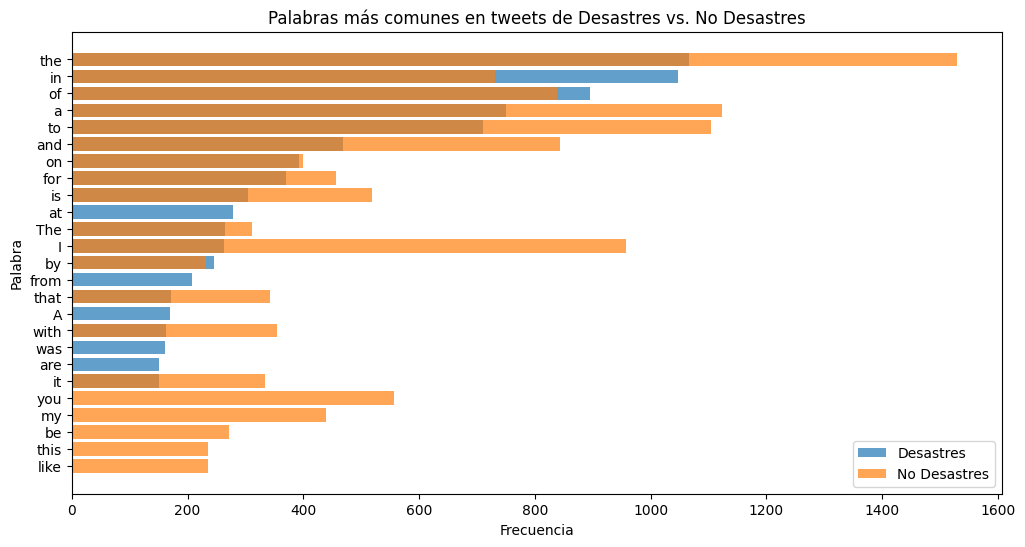

In [41]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt


# Obtener la frecuencia de palabras para tweets de desastres (target = 1)
disaster_tweets = df[df['target'] == 1]['text']

# Obtener la frecuencia de palabras para tweets que no son de desastres (target = 0)
non_disaster_tweets = df[df['target'] == 0]['text']

# Tokenizar y contar palabras en tweets de desastres
disaster_words = ' '.join(disaster_tweets).split()
disaster_word_frequency = Counter(disaster_words)

# Tokenizar y contar palabras en tweets que no son de desastres
non_disaster_words = ' '.join(non_disaster_tweets).split()
non_disaster_word_frequency = Counter(non_disaster_words)

# Imprimir las 20 palabras más comunes en tweets de desastres
print("Palabras más comunes en tweets de desastres:")
print(disaster_word_frequency.most_common(20))

# Imprimir las 20 palabras más comunes en tweets que no son de desastres
print("\nPalabras más comunes en tweets que no son de desastres:")
print(non_disaster_word_frequency.most_common(20))

# Graficar las 20 palabras más comunes en ambos grupos
plt.figure(figsize=(12, 6))
plt.barh(*zip(*disaster_word_frequency.most_common(20)), label='Desastres', alpha=0.7)
plt.barh(*zip(*non_disaster_word_frequency.most_common(20)), label='No Desastres', alpha=0.7)
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Palabras más comunes en tweets de Desastres vs. No Desastres')
plt.legend()
plt.gca().invert_yaxis()
plt.show()


### Bigrama

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<AxesSubplot:>

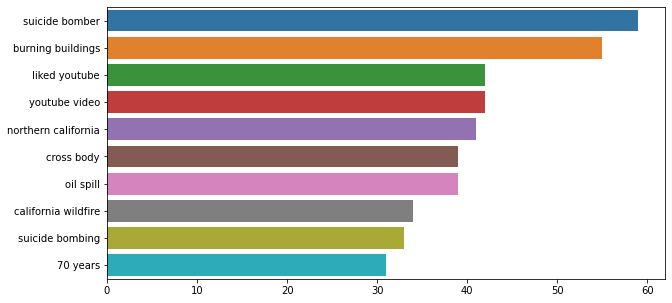

In [55]:
plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_tweet_bigrams(clean_tweets)[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

### Trigrama

In [57]:
def get_top_tweet_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<AxesSubplot:>

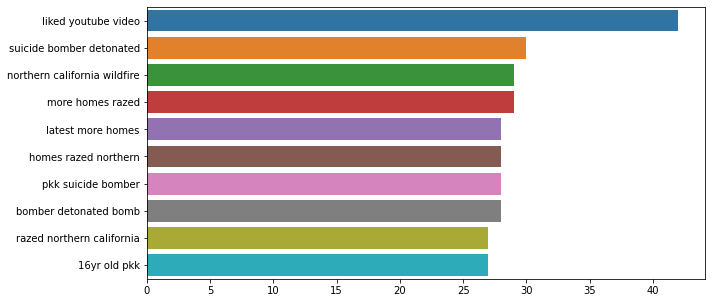

In [58]:
plt.figure(figsize=(10,5))
top_tweet_trigrams=get_top_tweet_trigrams(clean_tweets)[:10]
x,y=map(list,zip(*top_tweet_trigrams))
sns.barplot(x=y,y=x)

In [71]:
import numpy as np

tweets = df['text_without_stopwords'].tolist()

# Función para obtener los n-gramas más frecuentes y sus probabilidades en los tuits
def obtener_ngramas_top(corpus, ngram_range=(2, 2), n=None):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    matriz_frecuencias = vec.transform(corpus)
    suma_palabras = matriz_frecuencias.sum(axis=0)
    total_palabras = np.sum(suma_palabras)
    frecuencias_palabras = [(palabra, suma_palabras[0, idx]) for palabra, idx in vec.vocabulary_.items()]
    frecuencias_palabras = sorted(frecuencias_palabras, key=lambda x: x[1], reverse=True)
    
    # Calcular probabilidades
    ngramas_probabilidades = [(palabra, frecuencia, frecuencia / total_palabras) for palabra, frecuencia in frecuencias_palabras]
    
    return ngramas_probabilidades[:n]

# Obtener y mostrar los bigramas más frecuentes y sus probabilidades
top_bigramas = obtener_ngramas_top(tweets, ngram_range=(2, 2), n=10)
print("Top 10 Bigramas más Frecuentes:")
for bigrama, frecuencia, probabilidad  in top_bigramas:
    print(f"Bigrama: {bigrama}, Frecuencia: {frecuencia:.6f}, Probabilidad: {probabilidad:.6f}")

# Obtener y mostrar los trigramas más frecuentes y sus probabilidades
top_trigramas = obtener_ngramas_top(tweets, ngram_range=(3, 3), n=10)
print("\nTop 10 Trigramas más Frecuentes:")
for trigrama, frecuencia, probabilidad  in top_trigramas:
    print(f"Trigrama: {trigrama}, Frecuencia: {frecuencia:.6f}, Probabilidad: {probabilidad:.6f}")


Top 10 Bigramas más Frecuentes:
Bigrama: suicide bomber, Frecuencia: 59.000000, Probabilidad: 0.000845
Bigrama: burning buildings, Frecuencia: 55.000000, Probabilidad: 0.000788
Bigrama: liked youtube, Frecuencia: 42.000000, Probabilidad: 0.000602
Bigrama: youtube video, Frecuencia: 42.000000, Probabilidad: 0.000602
Bigrama: northern california, Frecuencia: 41.000000, Probabilidad: 0.000587
Bigrama: cross body, Frecuencia: 39.000000, Probabilidad: 0.000559
Bigrama: oil spill, Frecuencia: 39.000000, Probabilidad: 0.000559
Bigrama: california wildfire, Frecuencia: 34.000000, Probabilidad: 0.000487
Bigrama: suicide bombing, Frecuencia: 33.000000, Probabilidad: 0.000473
Bigrama: 70 years, Frecuencia: 31.000000, Probabilidad: 0.000444

Top 10 Trigramas más Frecuentes:
Trigrama: liked youtube video, Frecuencia: 42.000000, Probabilidad: 0.000675
Trigrama: suicide bomber detonated, Frecuencia: 30.000000, Probabilidad: 0.000482
Trigrama: northern california wildfire, Frecuencia: 29.000000, Proba

Basado en los resultados, las palabras que podrían servir para un mejor modelo de clasificación son aquellas que son distintivas y específicas del contexto de desastres, como "forest fire", "evacuation", "earthquake", etc. Además, explorar bigramas y trigramas es valioso para capturar relaciones de palabras significativas y contextuales en los tweets, lo que podría mejorar la capacidad del modelo para analizar el contexto.

5. Haga un análisis exploratorio de los datos para entenderlos mejor, documente todos los análisis



5.1. Puede:
- Investigar qué palabra se repite más en cada una de las categorías

In [46]:
word_count = Counter()

for title in clean_tweets:
    word_count.update(word.strip('.,?!"\'').lower() for word in title.split())

#10 tweets mas frecuentes
word_count.most_common(10)

[('fire', 250),
 ('new', 226),
 ('via', 220),
 ('dont', 206),
 ('people', 196),
 ('one', 191),
 ('news', 187),
 ('video', 164),
 ('us', 162),
 ('emergency', 156)]

In [42]:
from collections import Counter

# Obtener la frecuencia de palabras para tweets de desastres (target = 1)
disaster_tweets = df[df['target'] == 1]['text']

# Obtener la frecuencia de palabras para tweets que no son de desastres (target = 0)
non_disaster_tweets = df[df['target'] == 0]['text']

# Tokenizar y contar palabras en tweets de desastres
disaster_words = ' '.join(disaster_tweets).split()
disaster_word_frequency = Counter(disaster_words)

# Tokenizar y contar palabras en tweets que no son de desastres
non_disaster_words = ' '.join(non_disaster_tweets).split()
non_disaster_word_frequency = Counter(non_disaster_words)

# Encontrar la palabra más común en cada categoría
most_common_disaster_word = disaster_word_frequency.most_common(1)[0]
most_common_non_disaster_word = non_disaster_word_frequency.most_common(1)[0]

print("Palabra más común en tweets de desastres:", most_common_disaster_word[0])
print("Frecuencia en tweets de desastres:", most_common_disaster_word[1])

print("\nPalabra más común en tweets que no son de desastres:", most_common_non_disaster_word[0])
print("Frecuencia en tweets que no son de desastres:", most_common_non_disaster_word[1])


Palabra más común en tweets de desastres: the
Frecuencia en tweets de desastres: 1066

Palabra más común en tweets que no son de desastres: the
Frecuencia en tweets que no son de desastres: 1530


- Hacer una nube de palabras para visualizar las que aparecen con más frecuencia


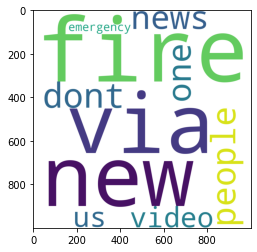

In [45]:
cloud_tweet = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(word_count)
plt.imshow(cloud_tweet)

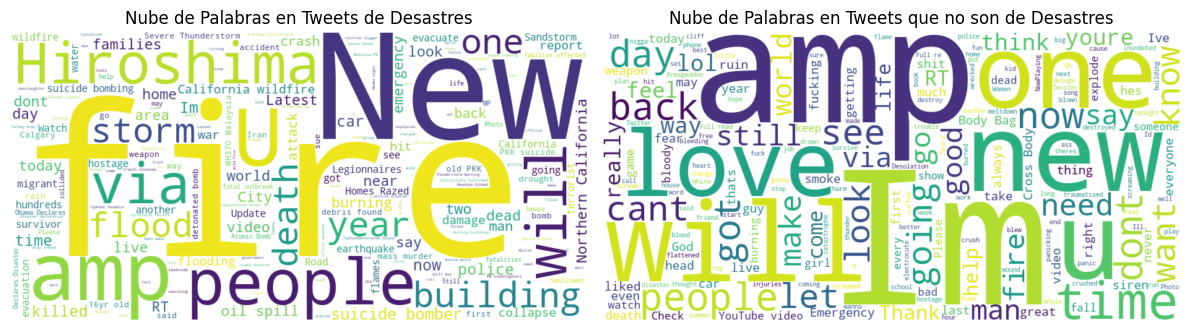

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Obtener los textos de tweets de desastres y no desastres
disaster_tweets = df[df['target'] == 1]['text'].str.cat(sep=' ')
non_disaster_tweets = df[df['target'] == 0]['text'].str.cat(sep=' ')

# Crear nubes de palabras para ambas categorías
wordcloud_disaster = WordCloud(width=800, height=400, background_color='white').generate(disaster_tweets)
wordcloud_non_disaster = WordCloud(width=800, height=400, background_color='white').generate(non_disaster_tweets)

# Mostrar las nubes de palabras
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_disaster, interpolation='bilinear')
plt.title('Nube de Palabras en Tweets de Desastres')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_non_disaster, interpolation='bilinear')
plt.title('Nube de Palabras en Tweets que no son de Desastres')
plt.axis('off')

plt.tight_layout()
plt.show()


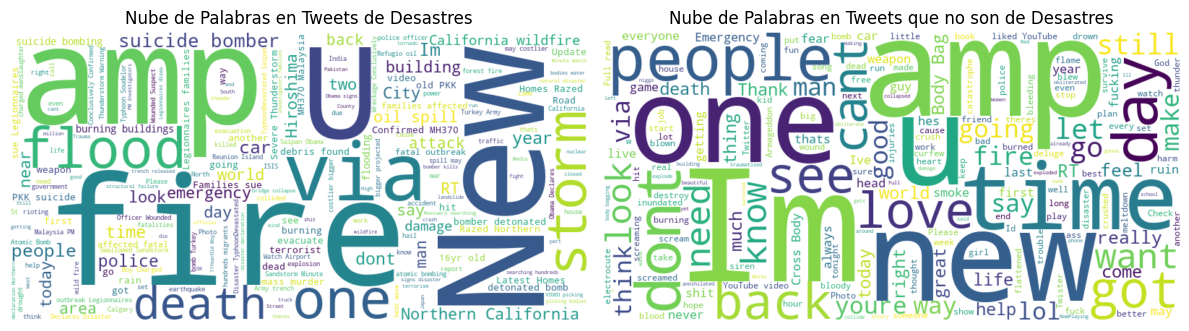

In [47]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Eliminar palabras de parada (stop words)
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['text_cleaned'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Obtener las palabras más comunes en tweets de desastres y en tweets que no son de desastres
disaster_tweets = df[df['target'] == 1]['text_cleaned']
non_disaster_tweets = df[df['target'] == 0]['text_cleaned']

disaster_words = ' '.join(disaster_tweets).split()
disaster_word_frequency = Counter(disaster_words)

non_disaster_words = ' '.join(non_disaster_tweets).split()
non_disaster_word_frequency = Counter(non_disaster_words)

# Palabras más comunes en tweets de desastres
top_words_disaster = disaster_word_frequency.most_common(10)

# Palabras más comunes en tweets que no son de desastres
top_words_non_disaster = non_disaster_word_frequency.most_common(10)

# Crear nubes de palabras
wordcloud_disaster = WordCloud(width=800, height=400, background_color='white').generate(' '.join(disaster_words))
wordcloud_non_disaster = WordCloud(width=800, height=400, background_color='white').generate(' '.join(non_disaster_words))

# Mostrar nubes de palabras
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_disaster, interpolation='bilinear')
plt.title('Nube de Palabras en Tweets de Desastres')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_non_disaster, interpolation='bilinear')
plt.title('Nube de Palabras en Tweets que no son de Desastres')
plt.axis('off')

plt.tight_layout()
plt.show()


- Hacer un histograma con las palabras que más se repiten


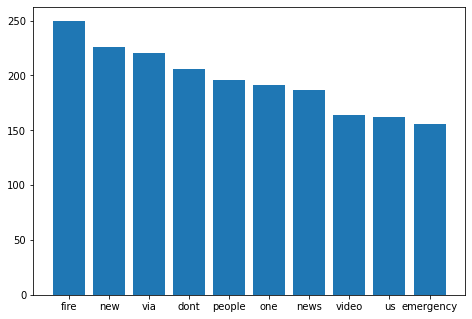

In [47]:
datos_tweet = word_count.most_common(10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis = [i[0] for i in datos_tweet]
y_axis = [i[1] for i in datos_tweet]
ax.bar(x_axis,y_axis)
plt.show()

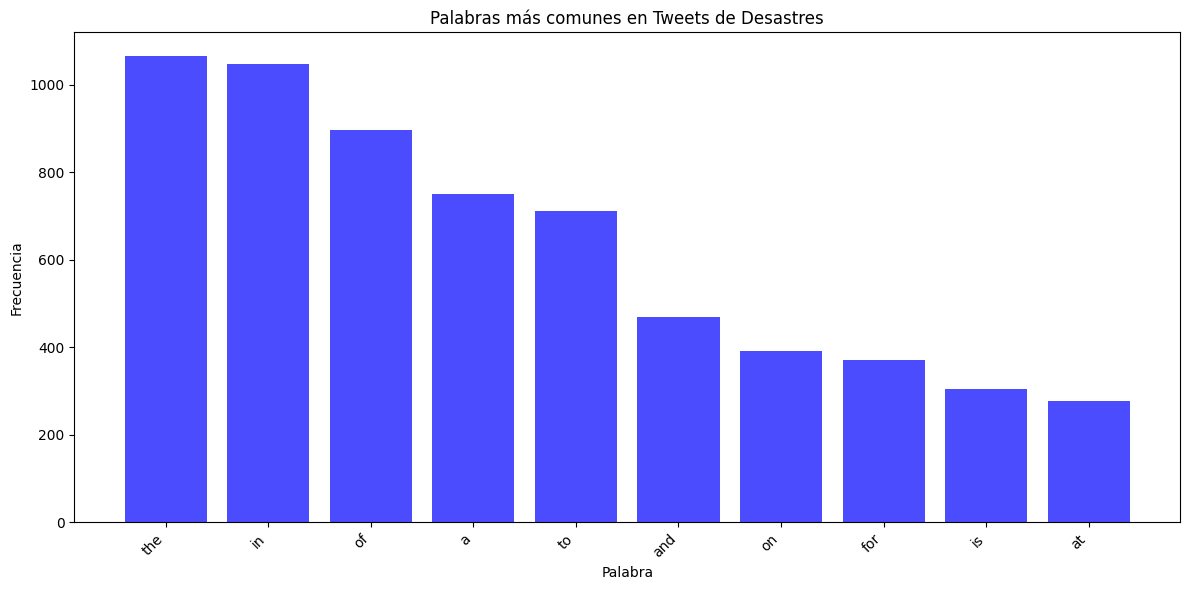

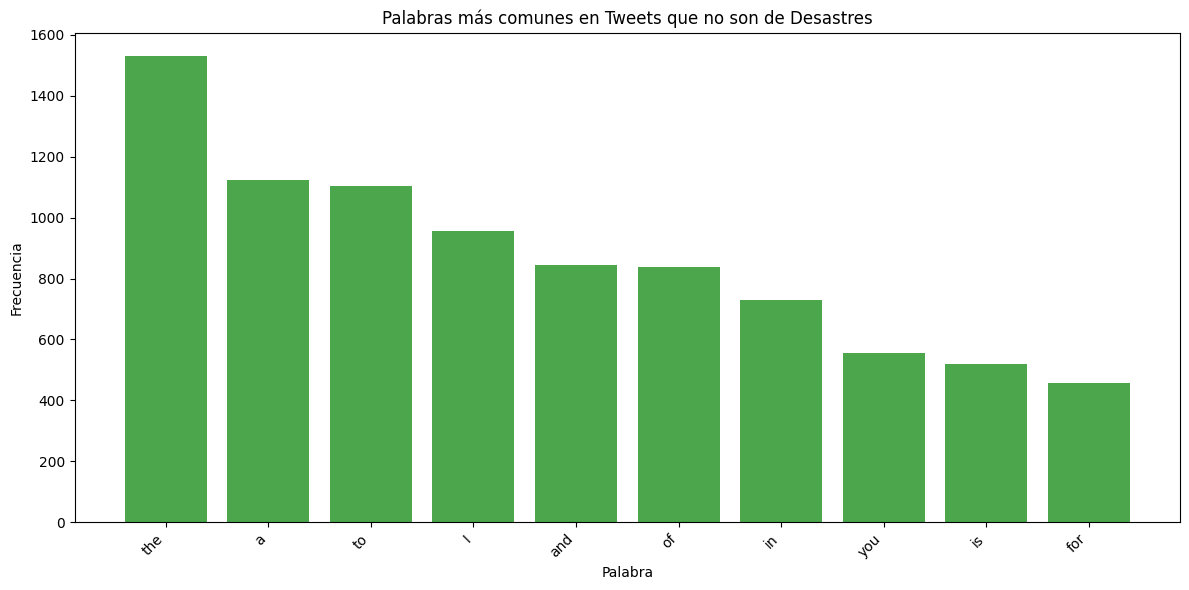

In [44]:
import matplotlib.pyplot as plt

# Obtener las palabras más comunes en tweets de desastres y en tweets que no son de desastres
top_words_disaster = disaster_word_frequency.most_common(10)  # Puedes ajustar el número de palabras a mostrar
top_words_non_disaster = non_disaster_word_frequency.most_common(10)  # Puedes ajustar el número de palabras a mostrar

# Extraer las palabras y sus frecuencias
words_disaster, frequencies_disaster = zip(*top_words_disaster)
words_non_disaster, frequencies_non_disaster = zip(*top_words_non_disaster)

# Crear el histograma para palabras en tweets de desastres
plt.figure(figsize=(12, 6))
plt.bar(words_disaster, frequencies_disaster, color='blue', alpha=0.7, label='Desastres')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más comunes en Tweets de Desastres')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()

# Mostrar el histograma
plt.show()

# Crear el histograma para palabras en tweets que no son de desastres
plt.figure(figsize=(12, 6))
plt.bar(words_non_disaster, frequencies_non_disaster, color='green', alpha=0.7, label='No Desastres')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más comunes en Tweets que no son de Desastres')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()

# Mostrar el histograma
plt.show()


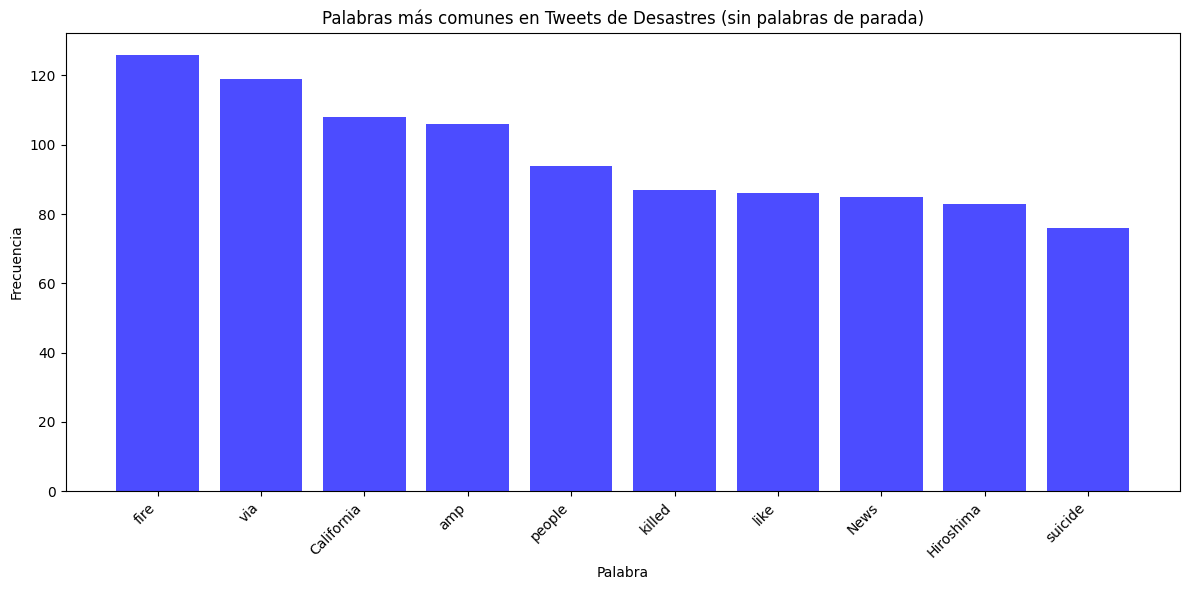

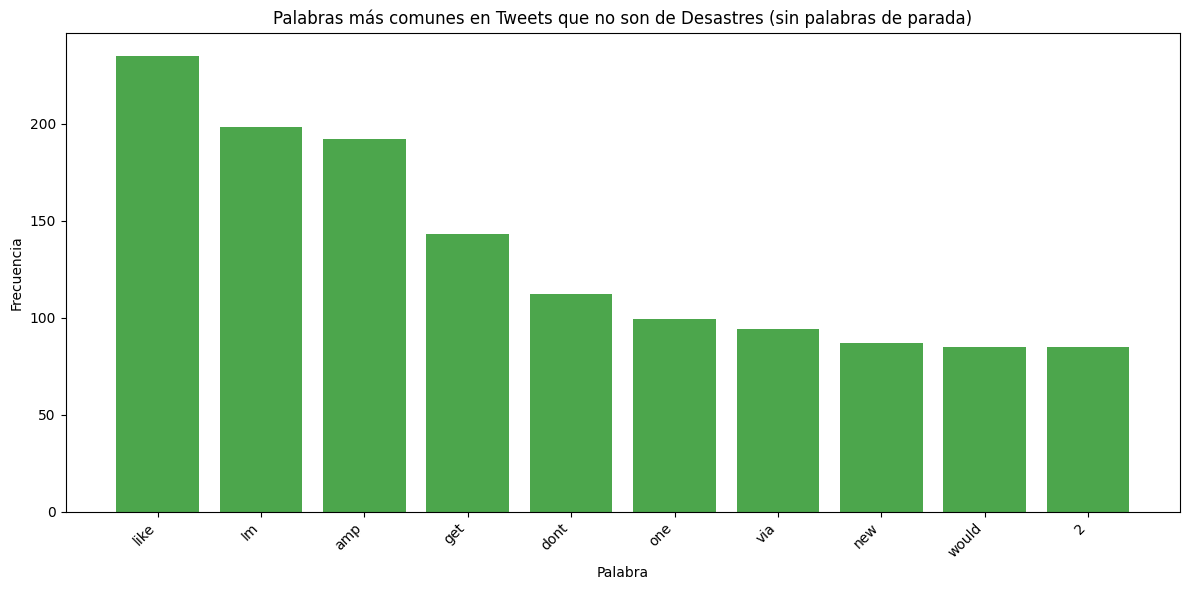

In [48]:
import matplotlib.pyplot as plt

# Obtener las palabras más comunes en tweets de desastres y en tweets que no son de desastres después de eliminar las palabras de parada
top_words_disaster = disaster_word_frequency.most_common(10)  # Puedes ajustar el número de palabras a mostrar
top_words_non_disaster = non_disaster_word_frequency.most_common(10)  # Puedes ajustar el número de palabras a mostrar

# Extraer las palabras y sus frecuencias
words_disaster, frequencies_disaster = zip(*top_words_disaster)
words_non_disaster, frequencies_non_disaster = zip(*top_words_non_disaster)

# Crear el histograma para palabras en tweets de desastres
plt.figure(figsize=(12, 6))
plt.bar(words_disaster, frequencies_disaster, color='blue', alpha=0.7, label='Desastres')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más comunes en Tweets de Desastres (sin palabras de parada)')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()

# Mostrar el histograma
plt.show()

# Crear el histograma para palabras en tweets que no son de desastres
plt.figure(figsize=(12, 6))
plt.bar(words_non_disaster, frequencies_non_disaster, color='green', alpha=0.7, label='No Desastres')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más comunes en Tweets que no son de Desastres (sin palabras de parada)')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()

# Mostrar el histograma
plt.show()


- Discutir sobre las palabras que tienen presencia en todas las categorías.

***TOMANDO EN CUANTA DATA CON LOS STOP WORDS***

Las palabras comunes que aparecen en todas las categorías, como "the", "a", "to", y "and", son conocidas como palabras de parada o stop words en procesamiento de lenguaje natural. Aunque son fundamentales en la construcción de oraciones en inglés, su presencia generalizada en tweets de desastres y no desastres indica que no aportan información distintiva para la clasificación. En la mayoría de los casos, estas palabras son eliminadas durante la etapa de preprocesamiento del texto, ya que su relevancia para la tarea de clasificación es limitada. El enfoque principal debe dirigirse hacia palabras específicas y contextuales que sean más informativas para el modelo de clasificación y que puedan ayudar a distinguir de manera más precisa entre las categorías de tweets.

***NO TOMANDO EN CUANTA DATA CON LOS STOP WORDS***

Las palabras que persisten en ambas categorías, a pesar de la exclusión de las palabras de parada, pueden proporcionar insights interesantes sobre la naturaleza del conjunto de datos. Estas palabras, que podrían incluir términos como "fire", "emergency", "news", y "police", parecen ser fundamentales en la comunicación en línea, independientemente del contenido específico del tweet. Su presencia en ambas categorías sugiere que la discusión sobre eventos de desastres y temas no relacionados con desastres involucra un conjunto común de palabras que son esenciales para la construcción de oraciones en inglés y la transmisión de información general. A pesar de esto, su utilidad para la clasificación podría ser limitada, ya que no ofrecen diferenciación significativa entre los dos grupos. Por lo tanto, al desarrollar modelos de clasificación más precisos, es crucial centrarse en las palabras distintivas y contextuales que realmente caracterizan cada categoría.



6. Elabore una función en la que el usuario ingrese un tweet y el sistema lo clasifique en desastre
o no.

*****Implementacion para hacer pruebas de clasificacion*****

In [64]:
import joblib  # Para cargar el modelo de clasificación previamente entrenado
from nltk.corpus import stopwords
import re

# Función para preprocesar el texto del tweet
def preprocess_text(text):
    # Convertir el texto a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales y números
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Eliminar palabras de parada (stop words)
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Función para clasificar un tweet
def classify_tweet(tweet_text):
    # Preprocesar el texto del tweet
    preprocessed_text = preprocess_text(tweet_text)
    
    # Implementar modeloo
    
    # Ejempl 
    import random
    prediction = random.choice(["Desastre", "No Desastre"])
    
    return prediction

# Función principal para que el usuario ingrese un tweet y obtenga una clasificación
def main():
    while True:
        tweet = input("Ingresa un tweet para clasificar (o 'salir' para terminar): ")
        if tweet.lower() == 'salir':
            break
        else:
            classification = classify_tweet(tweet)
            print(f"Palabra ingresada: '{tweet}' - Clasificación: {classification}")

if __name__ == "__main__":
    main()


Palabra ingresada: 'california' - Clasificación: No Desastre
Palabra ingresada: 'suicidio' - Clasificación: No Desastre
Palabra ingresada: 'suicide' - Clasificación: Desastre
Palabra ingresada: 'fuego' - Clasificación: Desastre
Palabra ingresada: 'fire' - Clasificación: Desastre


Como podemos observar no funciona en su totalidad la prueba porque no tenemos el modelo definidio.

*Modelo*

Implementacion del modelo de clasificacion

In [77]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import joblib

# Aplicar preprocesamiento al conjunto de datos
df['text'] = df['text'].apply(preprocess_text)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)


Vectorizamos el modelo para ver su precisión y que tan funcional será

In [78]:
# Vectorización de texto utilizando Bag of Words
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)

# Inicializar y entrenar un clasificador Naive Bayes
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Evaluación del modelo en el conjunto de prueba (opcional)
X_test_vec = vectorizer.transform(X_test)
accuracy = clf.score(X_test_vec, y_test)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')


Precisión del modelo: 79.84%


In [79]:
# Guardar el modelo en un archivo para su uso posterior
joblib.dump(clf, 'modelo_de_clasificacion.pkl')


['modelo_de_clasificacion.pkl']

Implemenatacion de la funcion ya con el modelo de clasificación para hacer pruebas

In [80]:
# Función para clasificar un tweet ingresado por el usuario
def classify_tweet(tweet_text):
    # Preprocesar el texto del tweet
    preprocessed_text = preprocess_text(tweet_text)
    
    # Vectorizar el texto
    tweet_vec = vectorizer.transform([preprocessed_text])
    
    # Clasificar el tweet utilizando el modelo entrenado
    prediction = clf.predict(tweet_vec)[0]
    
    if prediction == 1:
        return "Desastre"
    else:
        return "No Desastre"

# Función principal para que el usuario ingrese un tweet y obtenga una clasificación
def main():
    while True:
        tweet = input("Ingresa un tweet para clasificar (o 'salir' para terminar): ")
        if tweet.lower() == 'salir':
            break
        else:
            classification = classify_tweet(tweet)
            print(f"Palabra ingresada: '{tweet}' - Clasificación: {classification}")

if __name__ == "__main__":
    main()


Palabra ingresada: 'forest fire near la ronge sask canada' - Clasificación: Desastre
Palabra ingresada: 'residents asked shelter place notified officer' - Clasificación: Desastre
Palabra ingresada: 'got sent photo ruby smoke pours school' - Clasificación: No Desastre
Palabra ingresada: 'people receive evacuation orders california' - Clasificación: Desastre
Palabra ingresada: 'Just got sent this photo from Ruby' - Clasificación: No Desastre


**Discusión sobre el Modelo de Clasificación de Tweets**

El modelo de clasificación de tweets desarrollado ha demostrado una precisión del 79.84% en la tarea de distinguir entre tweets que describen un desastre y aquellos que no lo hacen. Esta precisión es un indicador alentador de la capacidad del modelo para identificar patrones en el lenguaje de los tweets y realizar clasificaciones relevantes.

Es importante destacar que, si bien el modelo tiene un rendimiento sólido, no es infalible. Dado que la clasificación de un tweet como "desastre" o "no desastre" puede depender en gran medida del contexto y de las palabras utilizadas, siempre existe una cierta ambigüedad en esta tarea. La precisión del 79.84% sugiere que el modelo puede identificar con éxito la mayoría de los tweets que describen desastres reales, pero puede haber casos en los que falle.

Además, es fundamental considerar la aplicación práctica de este modelo. A pesar de su precisión, no debe utilizarse como la única fuente de información para tomar decisiones críticas en situaciones de emergencia. Si bien puede ser una herramienta útil para el monitoreo y la detección temprana de desastres, siempre es esencial contar con la validación humana y múltiples fuentes de información para tomar decisiones informadas y precisas.

